# Modificación de la opción 2
## para la modificación del ejemplo 2 se utilizó un .csv como fuente de datos para la creación del dataframe

In [1]:
#importación de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#creación del dataframe desde un archivo .csv
df_ejemplo = pd.read_csv('datasetEjemplo.csv',sep=',')

# utilización del método figure de la librería matplotlib para asignar el tamaño de las imágenes
plt.figure(figsize=(30, 20))


<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

# Gráfica de los riesgos de ciberseguridad por la complejidad de las vulnerabilidades
## la columna complexity contiene valores referentes a la complejidad asociada con la vulnerabilidad

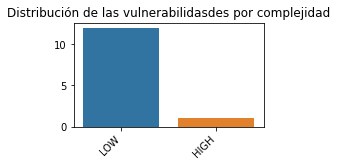

In [2]:
# 1. Distribución de eventos por tipo
plt.subplot(2, 2, 1)
eventos_count = df_ejemplo['complexity'].value_counts()
sns.barplot(x=eventos_count.index, y=eventos_count.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de las vulnerabilidasdes por complejidad')

plt.tight_layout()

# Gráfica de las vulnerabilidades por severidad

Text(0.5, 1.0, 'Distribución de las vulnerabilidades  por Severidad')

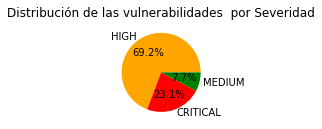

In [3]:
# 2. Distribución de las vulnerabilidades por severidad
plt.subplot(2, 2, 2)
severidad_count = df_ejemplo['severity'].value_counts()
colors = {'MEDIUM': 'green', 'HIGH': 'orange', 'CRITICAL': 'red'}
plt.pie(severidad_count, labels=severidad_count.index, autopct='%1.1f%%',
        colors=[colors[sev] for sev in severidad_count.index])
plt.title('Distribución de las vulnerabilidades  por Severidad')

# Gráfica de las vulnerabilidades agregadas a CISA por fecha

Text(0, 0.5, 'Número de vulnerabilidades')

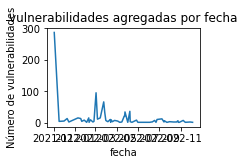

In [4]:
# 3. vulnerabilidades agregadas por fecha
df_ejemplo['date_added'] = pd.to_datetime(df_ejemplo['date_added'])
plt.subplot(2, 2, 3)
df_ejemplo['year'] = df_ejemplo['date_added'].dt.month_name
hourly_count = df_ejemplo.groupby('date_added').size()
sns.lineplot(x=hourly_count.index, y=hourly_count.values)

plt.title('vulnerabilidades agregadas por fecha')
plt.xlabel('fecha')
plt.ylabel('Número de vulnerabilidades')


# Gráfica de los eventos por fecha

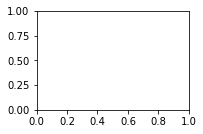

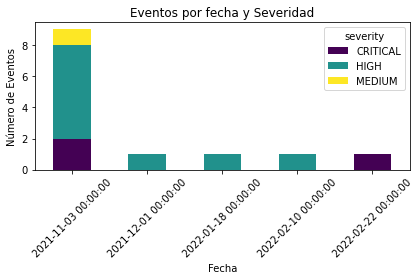

In [5]:
# 4. Eventos por fecha y por severidad
plt.subplot(2, 2, 4)
df_ejemplo['date'] = df_ejemplo['date_added']
pivot_table = pd.crosstab(df_ejemplo['date'], df_ejemplo['severity'])
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Eventos por fecha y Severidad')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('imagen_eventos_fecha_severidad.png')

# Gráfica de calor de las vulnerabilidades 

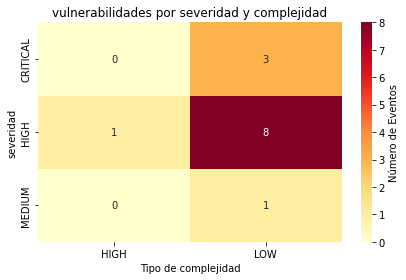

In [ ]:
# 5. Análisis de las vulnerabilidades en cuanto a complejidad y severidad se trata

heatmap_data = pd.crosstab(df_ejemplo['severity'], df_ejemplo['complexity'])
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Número de Eventos'})
plt.title('vulnerabilidades por severidad y complejidad')
plt.xlabel('Tipo de complejidad')
plt.ylabel('severidad')
plt.tight_layout()
plt.savefig('activity_heatmap.png')

# 6 Ánalisis de las vulnerabilidades por nombre de del producto y severidad crítica

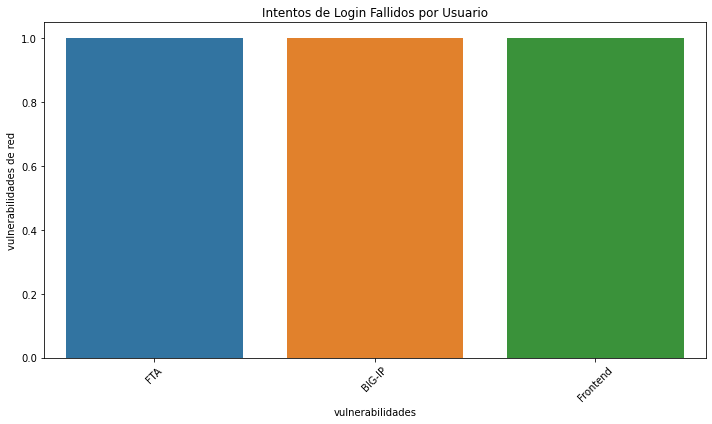

In [17]:
# 6. Análisis de accesos fallidos por usuario
plt.figure(figsize=(10, 6))
Vulnerabilidad_red = df_ejemplo[(df_ejemplo['severity'] == 'CRITICAL')]
fallos = Vulnerabilidad_red['product'].value_counts()
sns.barplot(x=fallos.index.fillna('NA'), y=fallos.values)
plt.title('Intentos de Login Fallidos por Usuario')
plt.xlabel('vulnerabilidades')
plt.ylabel('vulnerabilidades de red')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('failed_logins_by_user.png')

# 7 Linea de tiempo de las vulnerabilidades con la prioridad HIGH
## la fecha que se tomo del dataset es la columna due_date correspondiente al momento de correci´n de la vulnerabildad

Visualizaciones generadas correctamente. Revisa los archivos .png generados.


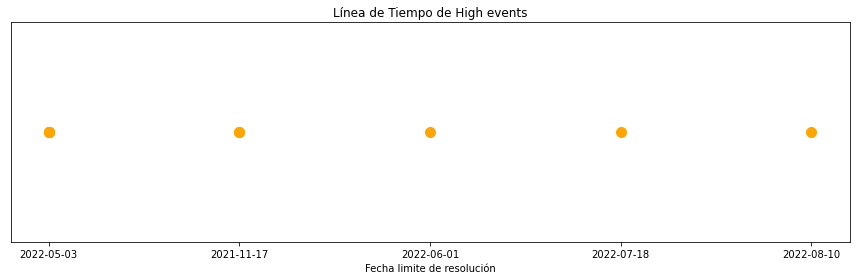

In [24]:
 #7. Línea de tiempo de eventos críticos
plt.figure(figsize=(12, 4))
high_events = df_ejemplo [df_ejemplo['severity'] == 'HIGH' ]
plt.scatter(high_events['due_date'], [1]*len(high_events), c='orange', s=100)
plt.yticks([])
plt.title('Línea de Tiempo de High events')
plt.xlabel('Fecha limite de resolución')
plt.tight_layout()
plt.savefig('critical_events_timeline.png')
print("Visualizaciones generadas correctamente. Revisa los archivos .png generados.")
